# Introduction
The primary goal of this project is to facilitate informed decision-making for Lobster Land by analyzing the entertainment industry esp. hotel and park. 

## Datasets Overview

**Park Accidents Dataset** (`park_accidents.csv`): Information on park accidents including number, gender distribution, and causes of each incident.  
**Analysis Techniques**: **Exploratory Data Analysis** such as ata visualization, summarization, and exploration for insight extraction.

**Ski Hotels Dataset** (`ski_hotels.csv`): Insights into strategies and service offerings of ski hotels, with data on price, altitude, total piste length, and number of lifts.  
**Analysis Techniques**: **Segmentation analysis** through clustering to identify focus areas and service priorities of hotels for better market positioning plan.

**Amenity Costs Dataset** (`amenity_costs.csv`): Customer survey data on preferences for hotel amenities, assisting in understanding and meeting customer expectations while considering amenity provision costs.  
**Analysis Techniques**: **Conjoint analysis** to understand customer preferences regarding various amenities, identifying the most valued features and combinations.

**Hotel Satisfaction Dataset** (`hotel_satisfaction.csv`): Individual guest feedback on various aspects of hotel stays, useful for analyzing and enhancing customer satisfaction in the hotel industry.  
**Analysis Techniques**: **Logistic regression classification** to predict guest satisfaction, providing a basis for recommendations and promotions aimed at improving guest loyalty.

## Analysis Steps

### 1. **Data Preprocessing**
- **Main Functions in Use**: 
  - `pd.read_csv()`: For reading in datasets.
  - `pd.isnull().sum()`, `pd.dropna()`: Handling missing values.
  - `pd.drop()`: Removing unnecessary columns.
  - `pd.astype()`: Adjusting data types for analysis readiness.

### 2. **Exploratory Data Analysis (EDA)**
- **Main Functions in Use**:
  - `pd.describe()`, `pd.groupby()`, `pd.agg()`: For generating descriptive statistics.
  - `sns.countplot()`, `sns.scatterplot()`: Visualizing data distributions and relationships.
  - `pd.pivot_table()`, `pd.value_counts()`: Summarizing and rearranging data for insights.
  - `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Labeling visualization axes and titles for clarity and understanding.

### 3. **Segmentation Analysis**
- **Main Functions in Use**:
  - `KMeans`: From scikit-learn, used for clustering and segmentation analysis on `ski_hotels.csv`.
  - `preprocessing` and `LabelEncoder`: For preparing data for the KMeans algorithm.

### 4. **Conjoint Analysis & Classification**
- **Main Functions in Use**:
  - Conjoint Analysis:
    - Various pandas functions for data manipulation and statsmodels for statistical analysis.
  - Classification:
    - `train_test_split`, `LogisticRegression`, `accuracy_score`, `confusion_matrix`, `classification_report`: For building, evaluating, and interpreting logistic regression models to predict guest satisfaction.

### 5. **Insights and Recommendations**
- The final step involves deriving insights from the analyses conducted through the various functions used in previous steps, and crafting actionable recommendations for Lobster Land to improve safety and enhance customer satisfaction in their skiing-themed hotel offerings.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from numpy.linalg import norm
import matplotlib.patches as mpatches
from sklearn.model_selection import GridSearchCV

analyzed several datasets collected from the park - park_accident, 

## Summary Stats
The dataset "park_accidents" was utilized to analyze various trends and segments related to park accidents. This analysis encompasses the number of Accidents Per Year, distribution by gender, and categorization per injury causes type, among other aspects.

### Main functions in use: 
- `.head()`
- `.info()`
- `.describe()`
- `.isnull().sum()`
- `groupby()`
- `plt.plot()`
- `matplotlib`
- `pivot_table()`

In [2]:
park_accidents = pd.read_csv("park_accidents.csv")

In [3]:
park_accidents.head()

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,False,False,False,0,2009
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,True,False,False,"This was the third ejection on this ride, unde...",2009
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),False,False,False,0,2008
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,False,False,False,0,2008
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,False,False,False,0,2008


In [4]:
park_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acc_id                14884 non-null  int64  
 1   acc_date              14884 non-null  object 
 2   acc_state             14884 non-null  object 
 3   acc_city              14884 non-null  object 
 4   fix_port              14884 non-null  object 
 5   source                14884 non-null  object 
 6   bus_type              14884 non-null  object 
 7   industry_sector       14884 non-null  object 
 8   device_category       14884 non-null  object 
 9   device_type           14884 non-null  object 
 10  tradename_or_generic  14884 non-null  object 
 11  manufacturer          14884 non-null  object 
 12  num_injured           14884 non-null  int64  
 13  age_youngest          14884 non-null  float64
 14  gender                14884 non-null  object 
 15  acc_desc           

In [5]:
park_accidents.describe()

,acc_id,num_injured,age_youngest,year
count,1.488400e+04,14884.000000,14884.000000,14884.000000
mean,9.097222e+05,1.081295,16.858976,2001.885783
std,7.476700e+03,2.360132,16.542130,3.481648
min,8.973520e+05,0.000000,0.000000,1986.000000
25%,9.048528e+05,1.000000,4.000000,2000.000000
50%,9.102445e+05,1.000000,12.000000,2002.000000
75%,9.164742e+05,1.000000,27.000000,2005.000000
max,1.009106e+06,99.000000,110.000000,2009.000000


In [6]:
park_accidents.isnull ().sum()

acc_id                  0
acc_date                0
acc_state               0
acc_city                0
fix_port                0
source                  0
bus_type                0
industry_sector         0
device_category         0
device_type             0
tradename_or_generic    0
manufacturer            0
num_injured             0
age_youngest            0
gender                  0
acc_desc                0
injury_desc             0
report                  0
category                0
mechanical              0
op_error                0
employee                0
notes                   0
year                    0
dtype: int64

In [7]:
# Count of Accidents 
accidents = park_accidents.groupby('year')['acc_id'].count().describe()
print(accidents)

count      24.000000
mean      620.166667
std       707.575939
min         1.000000
25%        73.000000
50%       225.000000
75%      1215.250000
max      2217.000000
Name: acc_id, dtype: float64


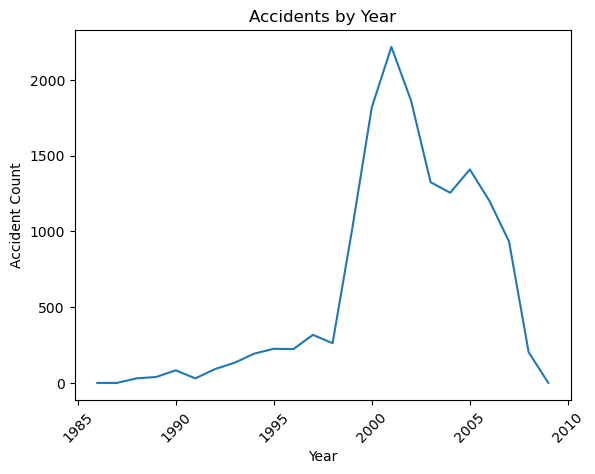

In [8]:
# Number of Accidents Per Year
yearly_accidents=park_accidents.groupby('year')["acc_id"].count()
plt.plot(yearly_accidents.index, yearly_accidents.values)
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Accidents by Year')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Count Accidents by Gender
accidents = park_accidents.groupby('gender')['acc_id'].count()
print(accidents)

gender
F    7041
M    5261
U    2582
Name: acc_id, dtype: int64


In [10]:
total_accidents = park_accidents['acc_id'].count()
monthly_accidents_proportion = park_accidents.groupby('gender')['acc_id'].count() / total_accidents
print(monthly_accidents_proportion)

gender
F    0.473058
M    0.353467
U    0.173475
Name: acc_id, dtype: float64


In [11]:
# Accident Causes by Type
accident_causes = park_accidents.drop(['year', 'acc_id', 'age_youngest'], axis=1).groupby(['mechanical', 'employee', 'op_error']).sum()
print(accident_causes)

                              num_injured
mechanical employee op_error             
False      False    False           14031
                    True              328
           True     False              10
                    True               30
True       False    False            1658
                    True               34
           True     False               3


C:\Users\Trista Hu\AppData\Local\Temp\ipykernel_3584\2398331361.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  accident_causes = park_accidents.drop(['year', 'acc_id', 'age_youngest'], axis=1).groupby(['mechanical', 'employee', 'op_error']).sum()


In [12]:
# Create a pivot table
pivot_table = park_accidents.pivot_table(index='category', values=['num_injured'], aggfunc='sum').sort_values(by='num_injured', ascending=False)

print(pivot_table)

                                                    num_injured
category                                                       
Impact: hit something in participatory attraction          2021
Load/Unload: scrape or stumble                             1507
Body pain (normal motion)                                  1438
Impact: hit something within ride vehicle                  1391
Collision: patron-controlled vehicles                      1296
Unknown (not enough info)                                  1264
Fall: patron fell off inner tube, mat or board              710
Equipment failure                                           696
Collision: patrons collided (participatory)                 664
Load/Unload: hit or pinched by restraint                    565
Collision: go-kart or bumper car hit stationary...          441
Illness or neurological symptoms                            425
Fall: in climb or play area                                 375
Collision: operator-controlled vehicles 

## Findings & Insights: 
- The dataset under consideration comprises **14,884 accident records**.
- On average, **each accident resulted in 1.08 injuries**.
  - The age range of individuals involved is **0 to 110 years old**.
- The data covers accidents occurring from **1986 to 2009**.
  - A gradual increase in accidents was noted from **1986 to 1999**.
  - There was a significant spike between **1999 and 2002**, peaking at **2,217 accidents in 2002**.
  - Post-2002, there's been a steady decline in accidents, with only **two recorded in 2009**.
- This decreasing trend in accidents suggests the **effectiveness of safety measures** implemented over the years. It is advisable for park owners to maintain these practices.
  
### Gender Distribution:
- Of the recorded accidents:
  - **47% involved females**
  - **35% involved males**
  - **17% were unspecified**
- There appears to be a higher incidence of accidents involving females, though this might be reflective of a larger female visitor population.

### Accident Causes:
- The primary causes of accidents include:
  - **"Impact: hit something in participatory attraction"**, leading to **2,021 injuries**
  - **"Load/Unload: scrape or stumble"**, resulting in **1,507 injuries**

### Dataset Limitations:
- The dataset does not effectively categorize the types of injuries (mechanical, employee, or op_error) in many cases, indicating undefined categories or potential issues in data collection.
- There's no detailed information regarding specific attractions or park locations where accidents happened, making it difficult to identify contributing factors related to specific rides or locations.
- The dataset lacks information on injury severity and long-term consequences.

### Recommendations for Business

## Segmentation Analysis
Analyzed with ski_hotels.csv dataset, aiming to analyze ski hotels to understand their segmentation strategies and focus areas, offering insights into the different market segments they target and services they prioritize.

### Steps taken:
1. **Data Cleansing and Preprocessing:** remove any inconsistencies, missing values, or outliers.
2. **Exploratory Data Analysis:** Visualize the data to identify initial patterns, trends, and insights.
3. **Segmentation Analysis:** Use clustering algorithms to segment ski hotels and analyze cluster's characteristics
4. **Insights and Recommendations:** Provide insights and recommendations for hoteliers to improve their market positioning

### Main functions in use: 
**Packages used:**
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `scikit-learn` 

**Data Cleaning and Preprocessing:**
- `.rename(columns=new_column_names)`
- `.replace()`
- `.dropna(subset=[])`
- `.astype()`
- `.groupby().agg()`

**Data Transformation:**
- `preprocessing.StandardScaler()`

**Clustering Analysis:**
- `KMeans(n_clusters=, random_state=)`
- `.fit()`
- `.fit_transform()`
- `.assign()`

**Visualization:**
- `plt.scatter()`
- `sns.pointplot()`
- `sns.heatmap()`
- `plt.figure(figsize=())`
- `sns.countplot()`
- `sns.scatterplot()`
- `sns.despine()`

In [13]:
skihotels = pd.read_csv ("ski_hotels.csv")

In [14]:
skihotels.head()

,Unnamed: 0,country,resort,hotel,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020(cm),decSnowHigh2020(cm),janSnowLow2020(cm),janSnowHigh2020(cm),febSnowLow2020(cm),febSnowHigh2020(cm)
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


In [15]:
skihotels.describe()

,Unnamed: 0,price (£),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,draglifts,blues,reds,blacks,totalRuns
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,203.000000,1095.027027,1358.781327,220.270270,60.395577,9.108108,24.766585,25.189189,41.115479,45.685504,14.007371,100.808354
std,117.635029,342.841268,508.322847,164.592139,39.025295,8.398517,16.968010,19.300095,40.742178,38.777112,12.131969,81.835216
min,0.000000,550.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.500000,839.000000,900.000000,110.000000,30.000000,3.000000,12.000000,12.000000,16.000000,18.000000,4.000000,40.000000
50%,203.000000,1021.000000,1441.000000,185.000000,55.000000,8.000000,22.000000,21.000000,30.000000,37.000000,9.000000,74.000000
75%,304.500000,1270.500000,1800.000000,282.000000,82.000000,11.000000,35.000000,32.000000,46.000000,60.000000,22.000000,133.000000
max,406.000000,2517.000000,2300.000000,1220.000000,206.000000,43.000000,83.000000,114.000000,186.000000,219.000000,51.000000,328.000000


In [16]:
skihotels2 = skihotels.drop('Unnamed: 0', 1)
skihotels2.head()

C:\Users\Trista Hu\AppData\Local\Temp\ipykernel_3584\550783777.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  skihotels2 = skihotels.drop('Unnamed: 0', 1)


,country,resort,hotel,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,chairlifts,...,blacks,totalRuns,link,sleeps,decSnowLow2020(cm),decSnowHigh2020(cm),janSnowLow2020(cm),janSnowHigh2020(cm),febSnowLow2020(cm),febSnowHigh2020(cm)
0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,9,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,9,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,7,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,4,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,7,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


In [17]:
new_column_names = {
    'price (£)': 'price',
    'altitude (m)': 'altitude_m',
    'totalPiste (km)': 'total_piste_km',
    'totalLifts': 'total_lifts',
    'gondolas': 'num_gondolas',
    'chairlifts': 'num_chairlifts',
    'draglifts': 'num_draglifts',
    'blues': 'num_blues',
    'reds': 'num_reds',
    'blacks': 'num_blacks',
    'totalRuns': 'total_runs'}
skihotels2 = skihotels2.rename(columns=new_column_names)

In [18]:
skihotels2.describe()

,price,altitude_m,total_piste_km,total_lifts,num_gondolas,num_chairlifts,num_draglifts,num_blues,num_reds,num_blacks,total_runs
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,1095.027027,1358.781327,220.270270,60.395577,9.108108,24.766585,25.189189,41.115479,45.685504,14.007371,100.808354
std,342.841268,508.322847,164.592139,39.025295,8.398517,16.968010,19.300095,40.742178,38.777112,12.131969,81.835216
min,550.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,839.000000,900.000000,110.000000,30.000000,3.000000,12.000000,12.000000,16.000000,18.000000,4.000000,40.000000
50%,1021.000000,1441.000000,185.000000,55.000000,8.000000,22.000000,21.000000,30.000000,37.000000,9.000000,74.000000
75%,1270.500000,1800.000000,282.000000,82.000000,11.000000,35.000000,32.000000,46.000000,60.000000,22.000000,133.000000
max,2517.000000,2300.000000,1220.000000,206.000000,43.000000,83.000000,114.000000,186.000000,219.000000,51.000000,328.000000


In [19]:
skihotels2.isnull ().sum()

country                   0
resort                    0
hotel                     0
price                     0
distance_from_lift_(m)    0
altitude_m                0
total_piste_km            0
total_lifts               0
num_gondolas              0
num_chairlifts            0
num_draglifts             0
num_blues                 0
num_reds                  0
num_blacks                0
total_runs                0
link                      0
sleeps                    0
decSnowLow2020(cm)        0
decSnowHigh2020(cm)       0
janSnowLow2020(cm)        0
janSnowHigh2020(cm)       0
febSnowLow2020(cm)        0
febSnowHigh2020(cm)       0
dtype: int64

In [20]:
skihotels2 = skihotels2.replace('unknown', np.nan)

In [21]:
skihotels2.isnull ().sum()

country                     0
resort                      0
hotel                       0
price                       0
distance_from_lift_(m)    192
altitude_m                  0
total_piste_km              0
total_lifts                 0
num_gondolas                0
num_chairlifts              0
num_draglifts               0
num_blues                   0
num_reds                    0
num_blacks                  0
total_runs                  0
link                        0
sleeps                     96
decSnowLow2020(cm)         56
decSnowHigh2020(cm)        56
janSnowLow2020(cm)         56
janSnowHigh2020(cm)        56
febSnowLow2020(cm)         56
febSnowHigh2020(cm)        56
dtype: int64

Due to the amount of NaN values for future analysis I will not be using the Distance from lift neither the snowfall columns. Hoewever the sleeps column is relevant for our analisis therefore we will drop the 96 rows of values missing

In [22]:
 skihotels2_new= skihotels2.dropna(subset=['sleeps'])

In [23]:
 skihotels2_new.shape


(311, 23)

In [24]:
 skihotels2_new.isnull ().sum()

country                     0
resort                      0
hotel                       0
price                       0
distance_from_lift_(m)    133
altitude_m                  0
total_piste_km              0
total_lifts                 0
num_gondolas                0
num_chairlifts              0
num_draglifts               0
num_blues                   0
num_reds                    0
num_blacks                  0
total_runs                  0
link                        0
sleeps                      0
decSnowLow2020(cm)         46
decSnowHigh2020(cm)        46
janSnowLow2020(cm)         46
janSnowHigh2020(cm)        46
febSnowLow2020(cm)         46
febSnowHigh2020(cm)        46
dtype: int64

In [25]:
skihotels2_new.describe()

,price,altitude_m,total_piste_km,total_lifts,num_gondolas,num_chairlifts,num_draglifts,num_blues,num_reds,num_blacks,total_runs
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,1115.302251,1373.887460,217.508039,59.646302,9.000000,24.495177,24.774920,41.591640,44.790997,13.929260,100.311897
std,350.221541,505.562156,164.183844,38.827870,8.313223,16.752443,19.079481,41.104161,37.334815,12.182542,81.636700
min,566.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,854.500000,900.000000,110.000000,30.000000,3.000000,12.000000,12.000000,16.000000,18.000000,4.000000,40.000000
50%,1051.000000,1450.000000,185.000000,55.000000,9.000000,22.000000,20.000000,30.000000,37.000000,9.000000,74.000000
75%,1295.500000,1800.000000,282.000000,82.000000,11.000000,35.000000,33.000000,55.000000,60.000000,22.000000,133.000000
max,2517.000000,2300.000000,1220.000000,206.000000,43.000000,82.000000,114.000000,186.000000,209.000000,51.000000,328.000000


it would seem there are impossible values in colum totalpiste as the max value seems to high in comparison to the other data. Thus I'll revise the amount of values at this level.

In [26]:
skihotels2_new.total_piste_km.value_counts().sort_index(ascending=False)

1220     1
762      2
650      2
600     20
425      4
400     12
350      6
348      1
305     13
300     16
284      1
280      1
276      1
270      8
265      2
250     13
249      6
230      9
225      3
220      7
210     10
208      7
200      6
193      4
185      6
176      2
175     12
150     11
146      3
145      1
140      2
136     12
132      5
120      8
110     17
103      3
100     14
95       1
93       4
80       1
70       7
63       6
60       4
58       3
50       6
48       4
44       4
40       4
25       3
24       1
20       2
18       2
17       3
12       1
0        4
Name: total_piste_km, dtype: int64

There is no total_piste_km as long as 1k+ in the world, therefore this impossible value shall be removed

In [27]:
# Filter the DataFrame to exclude the row where total_piste_km is equal to 1220
skihotels2_new = skihotels2_new[skihotels2_new.total_piste_km != 1220]
skihotels2_new.describe()

,price,altitude_m,total_piste_km,total_lifts,num_gondolas,num_chairlifts,num_draglifts,num_blues,num_reds,num_blacks,total_runs
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,1115.222581,1373.158065,214.274194,59.741935,9.006452,24.525806,24.829032,41.664516,44.845161,13.964516,100.474194
std,350.784962,506.215629,154.209874,38.853944,8.325884,16.770803,19.086410,41.150490,37.382938,12.186338,81.718423
min,566.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,854.250000,900.000000,110.000000,30.000000,3.000000,12.000000,12.000000,16.000000,18.000000,4.000000,40.000000
50%,1049.500000,1450.000000,185.000000,55.000000,9.000000,22.000000,20.000000,30.000000,37.000000,9.000000,74.000000
75%,1297.250000,1800.000000,279.000000,82.000000,11.000000,35.000000,33.500000,56.000000,60.000000,22.000000,133.000000
max,2517.000000,2300.000000,762.000000,206.000000,43.000000,82.000000,114.000000,186.000000,209.000000,51.000000,328.000000


In [28]:
# standarization
skihotels2_new.columns

Index(['country', 'resort', 'hotel', 'price', 'distance_from_lift_(m)',
       'altitude_m', 'total_piste_km', 'total_lifts', 'num_gondolas',
       'num_chairlifts', 'num_draglifts', 'num_blues', 'num_reds',
       'num_blacks', 'total_runs', 'link', 'sleeps', 'decSnowLow2020(cm)',
       'decSnowHigh2020(cm)', 'janSnowLow2020(cm)', 'janSnowHigh2020(cm)',
       'febSnowLow2020(cm)', 'febSnowHigh2020(cm)'],
      dtype='object')

In [29]:
skihotels3 = skihotels2_new[['price',
       'altitude_m', 'total_piste_km', 'total_lifts', 'num_gondolas',
       'num_chairlifts', 'num_draglifts', 'num_blues', 'num_reds',
       'num_blacks', 'total_runs', 'sleeps']]

In [30]:
skihotels3.head()

,price,altitude_m,total_piste_km,total_lifts,num_gondolas,num_chairlifts,num_draglifts,num_blues,num_reds,num_blacks,total_runs,sleeps
2,566,935,70,24,1,7,16,5.0,8.0,1.0,14.0,140
3,574,1390,58,18,1,4,13,1.0,13.0,1.0,15.0,590
4,596,935,70,24,1,7,16,5.0,8.0,1.0,14.0,386
5,597,1550,63,30,2,11,13,22.0,16.0,4.0,42.0,66
6,601,630,600,52,8,27,17,43.0,75.0,15.0,133.0,60


In [31]:
score = preprocessing.StandardScaler ()
SH3_standard = score.fit_transform(skihotels3)
SH3_standard = pd. DataFrame (SH3_standard)
SH3_standard.columns=skihotels3.columns

In [32]:
round(SH3_standard. describe(), 2)

,price,altitude_m,total_piste_km,total_lifts,num_gondolas,num_chairlifts,num_draglifts,num_blues,num_reds,num_blacks,total_runs,sleeps
count,310.00,310.00,310.00,310.00,310.00,310.00,310.00,310.00,310.00,310.00,310.00,310.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.57,-2.36,-1.39,-1.54,-1.08,-1.46,-1.30,-1.01,-1.20,-1.15,-1.23,-1.12
25%,-0.75,-0.94,-0.68,-0.77,-0.72,-0.75,-0.67,-0.62,-0.72,-0.82,-0.74,-0.57
50%,-0.19,0.15,-0.19,-0.12,-0.00,-0.15,-0.25,-0.28,-0.21,-0.41,-0.32,-0.32
75%,0.52,0.84,0.42,0.57,0.24,0.63,0.46,0.35,0.41,0.66,0.40,0.20
max,4.00,1.83,3.56,3.77,4.09,3.43,4.68,3.51,4.40,3.04,2.79,8.62


In [33]:
SH3_standard.head(5)

,price,altitude_m,total_piste_km,total_lifts,num_gondolas,num_chairlifts,num_draglifts,num_blues,num_reds,num_blacks,total_runs,sleeps
0,-1.568227,-0.866956,-0.937083,-0.921392,-0.963189,-1.046708,-0.463330,-0.892427,-0.987208,-1.065577,-1.059908,-0.001311
1,-1.545384,0.033324,-1.015025,-1.076066,-0.963189,-1.225880,-0.620764,-0.989788,-0.853241,-1.065577,-1.047651,3.656963
2,-1.482567,-0.866956,-0.937083,-0.921392,-0.963189,-1.046708,-0.463330,-0.892427,-0.987208,-1.065577,-1.059908,1.998545
3,-1.479711,0.349906,-0.982549,-0.766718,-0.842887,-0.807813,-0.620764,-0.478641,-0.772861,-0.819001,-0.716714,-0.602894
4,-1.468290,-1.470440,2.505348,-0.199580,-0.121078,0.147768,-0.410852,0.032506,0.807951,0.085108,0.398666,-0.651671


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

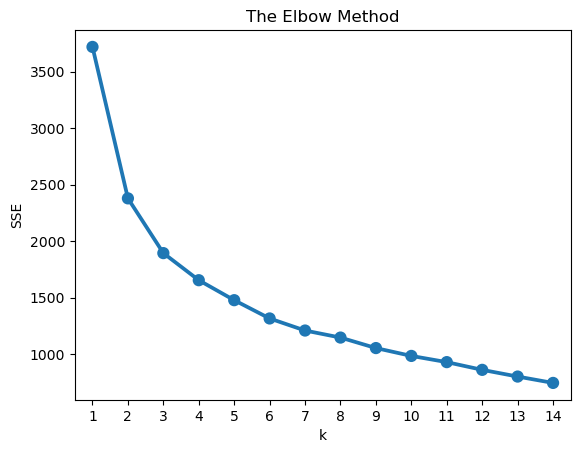

In [34]:
# Find the optimal k with Elbow Method
sse = {}
for k in range(1, 15):
 kmeans = KMeans (n_clusters=k, n_init=10, random_state=654)
 kmeans.fit (SH3_standard)
 sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()),y=list(sse.values()));

In [69]:
# Test cluster=3
kmeans = KMeans(n_clusters=3,random_state = 654)
kmeans.fit (SH3_standard)
cluster_labels = kmeans.labels_
SH3_standard2 = SH3_standard.assign(Cluster = cluster_labels)
SH3_standard2.groupby (['Cluster']) .agg({'price': 'mean',
'sleeps': 'mean','altitude_m': 'mean','total_piste_km': 'mean',
'total_lifts':'mean', 'total_runs':'mean'}).round(2)


C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,price,sleeps,altitude_m,total_piste_km,total_lifts,total_runs
Cluster,,,,,,
0,-0.21,0.13,-0.30,-0.72,-0.69,-0.73
1,0.09,-0.10,0.36,0.51,0.43,0.26
2,0.59,-0.24,0.06,1.44,1.57,2.36


In [70]:
# Test cluster=5
kmeans = KMeans(n_clusters=5,random_state = 654)
kmeans.fit (SH3_standard)
cluster_labels = kmeans.labels_
SH3_standard2 = SH3_standard.assign(Cluster = cluster_labels)
SH3_standard2.groupby (['Cluster']) .agg({'price': 'mean',
'sleeps': 'mean','altitude_m': 'mean','total_piste_km': 'mean',
'total_lifts':'mean', 'total_runs':'mean'}).round(2)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,price,sleeps,altitude_m,total_piste_km,total_lifts,total_runs
Cluster,,,,,,
0,-0.07,-0.02,0.40,0.70,0.54,0.43
1,0.19,-0.18,-0.40,-0.32,-0.11,-0.42
2,-0.32,0.26,-0.03,-0.89,-0.98,-0.86
3,0.58,-0.04,0.83,2.47,3.30,2.54
4,0.60,-0.36,-0.41,0.80,0.50,2.25


In [71]:
# Test cluster=4
kmeans = KMeans(n_clusters=4,random_state = 654)
kmeans.fit (SH3_standard)
cluster_labels = kmeans.labels_
SH3_standard2 = SH3_standard.assign(Cluster = cluster_labels)
SH3_standard2.groupby (['Cluster']) .agg({'price': 'mean',
'sleeps': 'mean','altitude_m': 'mean','total_piste_km': 'mean',
'total_lifts':'mean', 'total_runs':'mean'}).round(2)

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,price,sleeps,altitude_m,total_piste_km,total_lifts,total_runs
Cluster,,,,,,
0,0.58,-0.04,0.83,2.47,3.30,2.54
1,0.10,-0.09,0.37,0.51,0.43,0.25
2,0.56,-0.36,-0.45,0.78,0.52,2.21
3,-0.21,0.13,-0.30,-0.72,-0.69,-0.73


After revising the different clustering as it recorded a significant difference for 4 clusters but by 5 clusters, no visible additional value. Thus decided to go with 4 clusters.

In [72]:
# visualize clusters 
summary_stats=SH3_standard2.groupby (['Cluster']).agg({'price': 'mean',
'sleeps': 'mean','altitude_m': 'mean','total_piste_km': 'mean',
'total_lifts':'mean', 'total_runs':'mean'}).round(2)

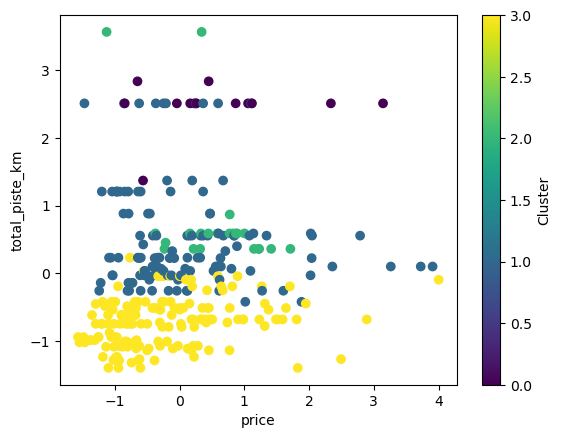

In [73]:
plt.scatter(SH3_standard2 ['price'], SH3_standard2 ['total_piste_km'], c=SH3_standard2 ['Cluster'],  cmap='viridis')
plt.xlabel('price')
plt.ylabel('total_piste_km')
cbar = plt.colorbar()
cbar.set_label('Cluster')

plt.show()

Outside of some outliers the clustering is clearly separated in the graph above.

In [74]:
print(summary_stats)

         price  sleeps  altitude_m  total_piste_km  total_lifts  total_runs
Cluster                                                                    
0         0.58   -0.04        0.83            2.47         3.30        2.54
1         0.10   -0.09        0.37            0.51         0.43        0.25
2         0.56   -0.36       -0.45            0.78         0.52        2.21
3        -0.21    0.13       -0.30           -0.72        -0.69       -0.73


In [75]:
SHsum = skihotels2_new.assign(Cluster = cluster_labels)
SHsum.dtypes

country                    object
resort                     object
hotel                      object
price                       int64
distance_from_lift_(m)     object
altitude_m                  int64
total_piste_km              int64
total_lifts                 int64
num_gondolas                int64
num_chairlifts              int64
num_draglifts               int64
num_blues                 float64
num_reds                  float64
num_blacks                float64
total_runs                float64
link                       object
sleeps                     object
decSnowLow2020(cm)         object
decSnowHigh2020(cm)        object
janSnowLow2020(cm)         object
janSnowHigh2020(cm)        object
febSnowLow2020(cm)         object
febSnowHigh2020(cm)        object
Cluster                     int32
dtype: object

To compare price with sleeps we must change the type of "sleeps" from object to int64

In [76]:
SHsum['sleeps'] = SHsum['sleeps'].astype('int64')
SHsum.dtypes

country                    object
resort                     object
hotel                      object
price                       int64
distance_from_lift_(m)     object
altitude_m                  int64
total_piste_km              int64
total_lifts                 int64
num_gondolas                int64
num_chairlifts              int64
num_draglifts               int64
num_blues                 float64
num_reds                  float64
num_blacks                float64
total_runs                float64
link                       object
sleeps                      int64
decSnowLow2020(cm)         object
decSnowHigh2020(cm)        object
janSnowLow2020(cm)         object
janSnowHigh2020(cm)        object
febSnowLow2020(cm)         object
febSnowHigh2020(cm)        object
Cluster                     int32
dtype: object

In [77]:
discretionary1 = SHsum.groupby('Cluster')[['price','sleeps']].mean ().sort_values(by='price', ascending=False)
discretionary1

,price,sleeps
Cluster,,
0,1318.08,135.85
2,1311.41,95.45
1,1149.39,128.51
3,1043.23,156.06


No clear correlation

In [78]:
discretionary2 = SHsum.groupby('Cluster')[['altitude_m','total_piste_km']].mean().sort_values(by='altitude_m', ascending=False)
discretionary2

,altitude_m,total_piste_km
Cluster,,
0,1792.31,594.23
1,1559.91,292.62
3,1223.32,103.42
2,1147.23,334.82


This graphic was done as a way to understand the features of the hotel and to see if there ws a trend between the length of the track and altitude of the ski start. The trend here is not necesarily clear but it can be seen that the higher the altitude the longer the track length.

In [79]:
discretionary3 = SHsum.groupby('Cluster')[['price','total_runs']].mean().sort_values(by='total_runs', ascending=False)
discretionary3

,price,total_runs
Cluster,,
0,1318.08,307.54
2,1311.41,280.86
1,1149.39,120.79
3,1043.23,41.27


Clear tendency that price increases the number of runs also does.

In [80]:
discretionary4 = SHsum.groupby('Cluster')[['price','total_lifts']].mean().sort_values(by='price', ascending=False)
discretionary4

,price,total_lifts
Cluster,,
0,1318.08,187.92
2,1311.41,79.77
1,1149.39,76.45
3,1043.23,32.93


The higher the price the larger the number of accessible lifts.

We used the total number of lifts and the total number of runs to obtain a clearer clustering instead of using 6 more variables that basically will give the same result.

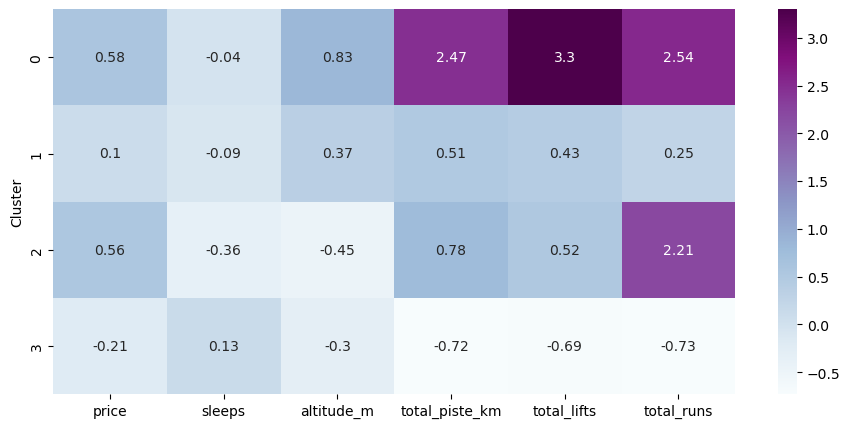

In [81]:
summary = SH3_standard2.groupby (['Cluster']) .agg({'price': 'mean',
'sleeps': 'mean','altitude_m': 'mean','total_piste_km': 'mean',
'total_lifts':'mean', 'total_runs':'mean'}).round (2)
plt.figure(figsize=(11,5))
sns.heatmap(summary, annot=True, cmap='BuPu', fmt='g');

To distinctly identify and memorably name each cluster based on their characteristics, I am considering the following names:
- **Cluster 0: "High-End Thrill Seekers"**
   - **Reasoning:** With higher mean values in price (0.58), altitude_m (0.83), total_piste_km (2.47), total_lifts (3.3), and total_runs (2.54), this cluster represents premium resorts that offer extensive ski areas and lift options, attracting enthusiasts willing to pay more for advanced and varied experiences. The moderate value for 'sleeps' (-0.04) suggests these resorts have a balanced accommodation capacity.

- **Cluster 1: "Budget-Friendly Family Resorts"**
   - **Reasoning:** This cluster has relatively lower mean values across all variables, with slight positives in price (0.1) and altitude_m (0.37). These resorts are more accessible and affordable, likely attracting families and casual skiers. With a slightly negative 'sleeps' value (-0.09), these resorts may offer a variety of accommodation options without overwhelming capacity.

- **Cluster 2: "Versatile Mid-Range Escapes"**
   - **Reasoning:** With a combination of positive and negative mean values (price: 0.56, sleeps: -0.36, altitude_m: -0.45, total_piste_km: -0.78, total_lifts: 0.52, total_runs: 2.21), this cluster represents resorts that offer a balance of features. They cater to a wide range of customers, from beginners to experienced skiers, with a versatile mix of trails and lifts at mid-range prices.

- **Cluster 3: "Cozy Low-Altitude Nooks"**
   - **Reasoning:** With predominantly negative mean values (except for 'sleeps' at 0.13), this cluster likely represents smaller, intimate resorts at lower altitudes. These resorts offer a cozy, relaxed skiing experience, ideal for beginners, or those looking for a quiet, less intense ski vacation. The negative values in altitude_m, total_piste_km, total_lifts, and total_runs suggest these resorts might not offer the expansive features of larger counterparts but excel in providing a comfortable, intimate atmosphere.

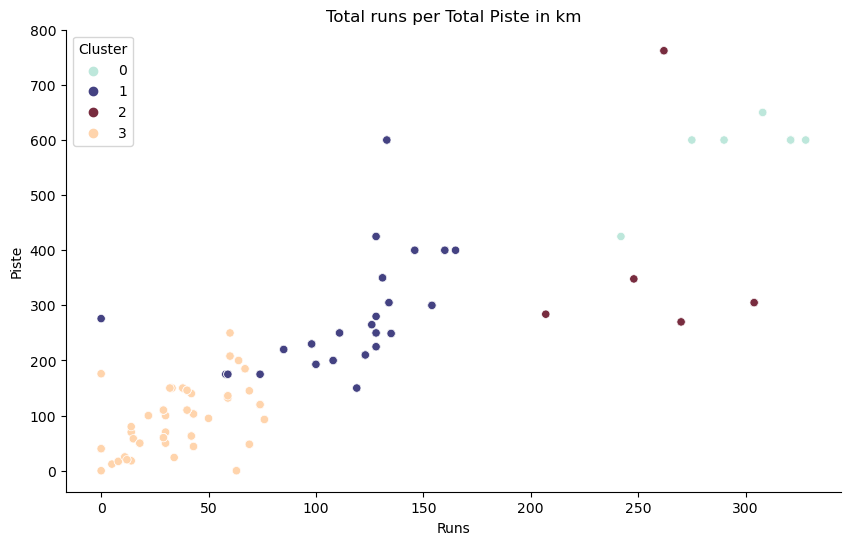

In [83]:
plt.figure(figsize=(10, 6))
plt.xlabel("price")
plt.ylabel("sleeps")
sns.despine()

sns.scatterplot(data = SHsum, x='total_runs', y='total_piste_km', hue="Cluster", palette="icefire")
plt.title("Total runs per Total Piste in km")
plt.xlabel("Runs")
plt.ylabel("Piste")
plt.legend(title="Cluster")
plt.show()

This graph just shows with clear clustering, how the number of runs increase as the price increments apart from certain outliers.

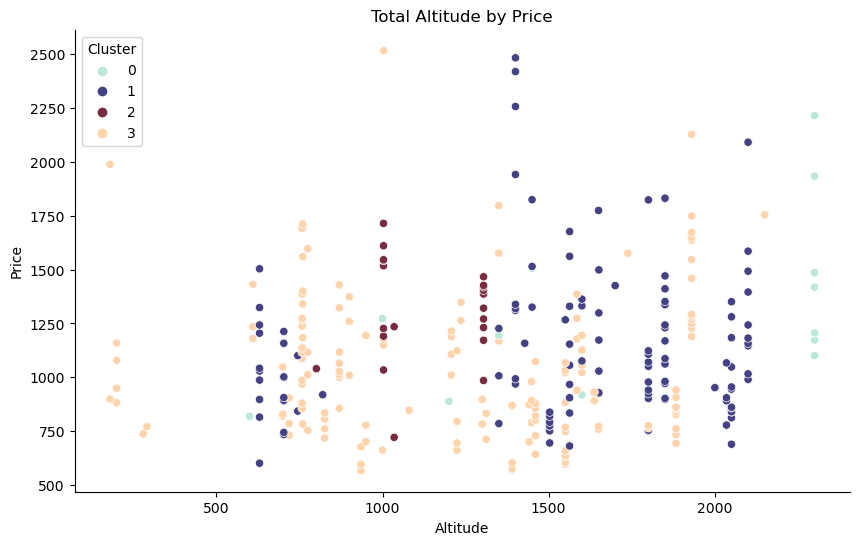

In [84]:
plt.figure(figsize=(10, 6))
plt.xlabel("price")
plt.ylabel("sleeps")
sns.despine()

sns.scatterplot(data = SHsum, x='altitude_m', y='price', hue="Cluster", palette="icefire")
plt.title("Total Altitude by Price")
plt.xlabel("Altitude")
plt.ylabel("Price")
plt.legend(title="Cluster")
plt.show()

This graph shows that there isn't much pattern between the altitude of the ski resort and the price. 

## Conjoint Analysis
Utilizing the `hotel_amenities.csv` dataset, we will conduct a conjoint analysis on hotel amenities. This analysis aims to assist businesses in understanding customer preferences regarding the combination of hotel amenities offered. It will also take into consideration the cost aspects of providing these amenities.

### Main Functions in Use
- `sort_values()`: Sorting DataFrame based on a column.
- `.head()`: Retrieving top n rows of the DataFrame.
- `LinearRegression()`: Initializing linear regression model from scikit-learn.
- `.fit()`: Fitting the linear model using features and target variable.
- `pd.DataFrame()`: Creating a DataFrame from the coefficients of the linear model.

In [53]:
amenities=pd.read_csv("hotel_amenities.csv")

In [54]:
#suppressing scientific notation, two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [55]:
amenities.head()

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,None,Valet,None,No,No,No,No,No,76,4.57
1,Basic,None,Valet,None,No,No,No,No,No,80,7.60
2,Basic,None,Valet,None,No,No,No,No,No,84,5.66
3,Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
4,Basic,None,Valet,None,No,No,No,No,Yes,80,4.56


In [56]:
amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WiFi_Network  6912 non-null   object 
 1   breakfast     6912 non-null   object 
 2   parking       6912 non-null   object 
 3   gym           6912 non-null   object 
 4   flex_check    6912 non-null   object 
 5   shuttle_bus   6912 non-null   object 
 6   air_pure      6912 non-null   object 
 7   jacuzzi       6912 non-null   object 
 8   VIP_shop      6912 non-null   object 
 9   pool_temp     6912 non-null   int64  
 10  avg_rating    6912 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 594.1+ KB


In [57]:
amenities.isna().sum()

WiFi_Network    0
breakfast       0
parking         0
gym             0
flex_check      0
shuttle_bus     0
air_pure        0
jacuzzi         0
VIP_shop        0
pool_temp       0
avg_rating      0
dtype: int64

In [58]:
costs=pd.read_csv("amenity_costs.csv")
costs

,Amenity,Level,"Estimated Incremental Cost,\nPer Visitor/Per Night"
0,WiFi_Network,Basic,11.75
1,WiFi_Network,Strong,16.25
2,WiFi_Network,Best in Class,19.15
3,breakfast,None,0.00
4,breakfast,Continental,13.25
5,breakfast,Full Buffet,22.45
6,parking,Valet,60.00
7,parking,Open Lot,15.00
8,gym,None,0.00
9,gym,Basic,10.00


In [59]:
#dummify all except outcome variable
amenitiesdummy = pd.get_dummies(amenities, drop_first=True, columns= ['WiFi_Network','breakfast','parking','gym','flex_check','shuttle_bus','air_pure','jacuzzi','VIP_shop','pool_temp'])

In [60]:
amenitiesdummy.sort_values(by='avg_rating', ascending=False).head()

,avg_rating,WiFi_Network_Best in Class,WiFi_Network_Strong,breakfast_Full Buffet,breakfast_None,parking_Valet,gym_Basic,gym_None,gym_Super,flex_check_Yes,shuttle_bus_Yes,air_pure_Yes,jacuzzi_Yes,VIP_shop_Yes,pool_temp_80,pool_temp_84
1863,10.00,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0
4596,10.00,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0
2680,10.00,0,1,0,1,1,0,0,1,1,1,1,0,1,1,0
4186,10.00,0,1,1,0,1,0,0,1,1,0,0,1,1,1,0
2726,9.99,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1


In [61]:
amenitiesdummy.columns

Index(['avg_rating', 'WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84'],
      dtype='object')

In [62]:
X = amenitiesdummy[['WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84']]
y = amenitiesdummy['avg_rating']

In [63]:
#build linear model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [64]:
regressor.intercept_

5.527955729166667

In [65]:
#display coefficients
coef_df=pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
WiFi_Network_Best in Class,1.73
WiFi_Network_Strong,1.19
breakfast_Full Buffet,0.50
breakfast_None,-0.23
parking_Valet,0.09
gym_Basic,-0.15
gym_None,-0.17
gym_Super,0.04
flex_check_Yes,0.48
shuttle_bus_Yes,0.42


**Insights on Customer Preference Based on Coefficients:** 
Each item clearly lists the levels in ascending order of popularity:
- **WiFi Network:** “Basic” < "Strong" (1.19) < "Best in Class" (1.73).
- **Breakfast:** “None” (-0.23) < “Continental” < “Full Buffet” (0.50).
- **Parking:** “Open Lot” < "Valet" (0.09).
- **Gym:** “None” (-0.17) < “Basic” (-0.15) < “Advanced” <"Super" (0.04).
- **Flexible Check-In:** “No” < “Yes” (0.48).
- **Shuttle Bus:** “No” < “Yes” (0.42).
- **Air Purification:** “No” < “Yes” (0.08).
- **Jacuzzi:** “No” < “Yes” (0.18).
- **VIP Shopping:** “No” < “Yes” (0.22).
- **Pool Temperature:** 76 degrees < 80 degrees (0.07) < 84 degrees (0.26).

In [66]:
amenities2=amenitiesdummy.sort_values(by=['avg_rating'],ascending=False)

In [67]:
amenities2.head()

,avg_rating,WiFi_Network_Best in Class,WiFi_Network_Strong,breakfast_Full Buffet,breakfast_None,parking_Valet,gym_Basic,gym_None,gym_Super,flex_check_Yes,shuttle_bus_Yes,air_pure_Yes,jacuzzi_Yes,VIP_shop_Yes,pool_temp_80,pool_temp_84
1863,10.00,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0
4596,10.00,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0
2680,10.00,0,1,0,1,1,0,0,1,1,1,1,0,1,1,0
4186,10.00,0,1,1,0,1,0,0,1,1,0,0,1,1,1,0
2726,9.99,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1


### Insights
**Best Rated Package Features Based On Customer Survey Result:**
- Strong WiFi, Full buffet breakfast, Valet parking, Super gym, Flexible check-in, Shuttle bus, Air purifier, No jacuzzi, VIP shop, Pool temperature at 76 or 80°F.

**Reality Check & Recommendations:**
- **Gym:** While 'Super' gym is popular, it's nearly double the cost of an 'Advanced' gym. Consider offering 'Advanced' gym as a cost-effective alternative with good facilities.
- **WiFi & Buffet:** Invest in strong WiFi and offer a full buffet - both crucial for a positive guest experience.
- **Parking:** Valet parking, while desirable, is not a necessity. Opt for 'Open Lot' parking to save costs. Consider offering shuttle services as a valet alternative.
- **Pool & Jacuzzi:** A warmer pool can potentially eliminate the need for a jacuzzi, saving costs. Aim for a pool temperature of 80°F as it’s optimal and cost-effective.
- **Air Purifiers:** Although desirable, they might not be essential if the hotel maintains high cleanliness standards. Weigh the additional cost against the benefits.
- **VIP Shop:** Retain this option for additional revenue.

**Cost Analysis & Final Recommendation:**
- A package with strong WiFi, full buffet breakfast, open lot parking, advanced gym, flexible check-in, shuttle bus, no jacuzzi, VIP shop, and 80°F pool temperature costs approximately $222.70 per room. 
- Considering a budget of $250, an additional air purifier can be included for $12.85, totaling $235.55 and leaving a buffer in the budget. This buffer can either be additional profit or a safeguard against losses from complimentary services offered to guests.
- **Final Package Recommendation:** Strong WiFi, Full buffet breakfast, Open lot parking, Advanced gym, Flexible check-in, Shuttle bus, Air purifier, No jacuzzi, VIP shop, 80°F pool temperature.

## Classification - Hotel Satisfaction Analysis

### Main Functions In Use
- `.corr()`
- `sns.heatmap()`
- `LabelEncoder()`
- `.fit()`
- `.transform()`
- `pd.get_dummies()`
- `train_test_split()`
- `sm.Logit()`
- `result.fit()`
- `result.summary()`
- `LogisticRegression()`
- `logmodel.fit()`
- `accuracy_score()`
- `classification_report()`
- `confusion_matrix()`
- `sns.heatmap()`
- `logmodel.predict()`

In [87]:
hotel_satisfaction_raw = pd.read_csv('hotel_satisfaction.csv')
hotel_satisfaction_raw.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [88]:
hotel_satisfaction = hotel_satisfaction_raw.drop("id", axis=1)

In [89]:
missing_values = hotel_satisfaction.isna().sum()
print(missing_values)

Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64


In [90]:
value_counts_satis = hotel_satisfaction['satisfaction'].value_counts()
print(value_counts_satis)

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64


In [91]:
hotel_satisfaction.describe()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00
mean,39.38,2.73,3.06,2.76,2.98,3.20,3.44,3.36,3.30,3.64,3.29
std,15.11,1.33,1.53,1.40,1.28,1.33,1.32,1.33,1.27,1.18,1.31
min,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,2.00
50%,40.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,4.00,3.00
75%,51.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00,4.00
max,85.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Per checked, no outliers, no missing value, no impossible value and no class imbalance in outcome variable "satisfaction"

In [92]:
hotel_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          103904 non-null  object
 1   Age                             103904 non-null  int64 
 2   purpose_of_travel               103904 non-null  object
 3   Type of Travel                  103904 non-null  object
 4   Type Of Booking                 103904 non-null  object
 5   Hotel wifi service              103904 non-null  int64 
 6   Departure/Arrival  convenience  103904 non-null  int64 
 7   Ease of Online booking          103904 non-null  int64 
 8   Hotel location                  103904 non-null  int64 
 9   Food and drink                  103904 non-null  int64 
 10  Stay comfort                    103904 non-null  int64 
 11  Common Room entertainment       103904 non-null  int64 
 12  Checkin/Checkout service      

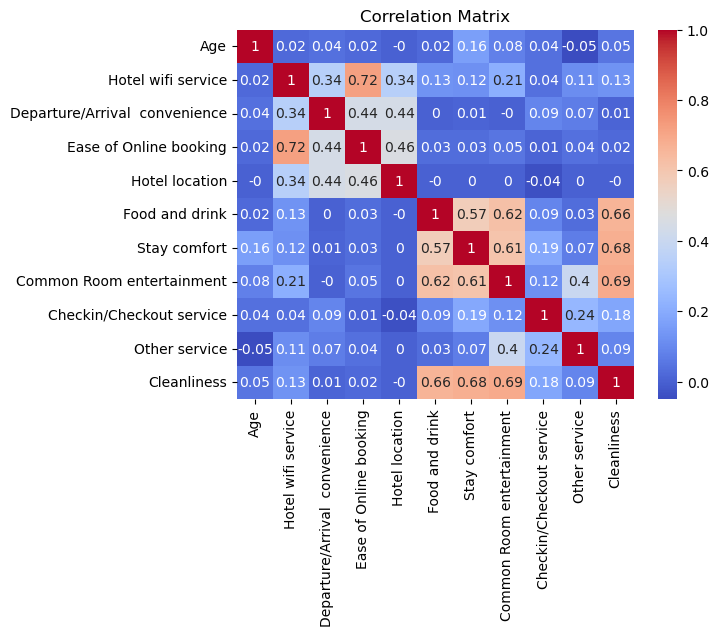

In [93]:
# Build a correlation matrix
selected_vars = ['Age','Hotel wifi service', 'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness']
subset_df = hotel_satisfaction[selected_vars]
correlation_matrix = subset_df.corr().round(2)
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

A correlation of 0.72 between Hotel wifi service and Ease of Online booking is relatively high,
but not high enough to present a significant problem with multicollinearity. Therefore, it is not
necessary to remove any variables.

In [94]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(hotel_satisfaction['satisfaction'])
hotel_satisfaction['satisfaction'] = label_encoder.transform(hotel_satisfaction['satisfaction'])

# Check the updated DataFrame
print(hotel_satisfaction['satisfaction'])

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int32


In [95]:
# Dummify categorical variables
satisfaction_dummies = pd.get_dummies(hotel_satisfaction, columns=['Gender', 'purpose_of_travel', 'Type of Travel', 'Type Of Booking'], drop_first=True)
satisfaction_dummies

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,Gender_Male,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
0,13,3,4,3,1,5,5,5,4,5,5,0,1,1,0,0,0,1,0,1
1,25,3,2,3,3,1,1,1,1,4,1,0,1,0,0,0,1,0,0,0
2,26,2,2,2,2,5,5,5,4,4,5,1,0,0,0,0,1,0,0,0
3,25,2,5,5,5,2,2,2,1,4,2,0,0,0,0,0,1,0,0,0
4,61,3,3,3,3,4,5,3,3,3,3,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,2,1,2,3,2,2,2,2,3,2,0,0,0,1,0,0,0,1,0
103900,49,4,4,4,4,2,5,5,5,5,4,1,1,0,0,0,1,0,0,0
103901,30,1,1,1,3,4,5,4,5,5,4,0,1,0,0,0,1,0,0,0
103902,22,1,1,1,5,1,1,1,5,4,1,0,0,0,1,0,0,0,1,0


In [96]:
satisfaction_dummies.columns

Index(['Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction', 'Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism',
       'Type of Travel_Personal Travel', 'Type Of Booking_Individual/Couple',
       'Type Of Booking_Not defined'],
      dtype='object')

In [97]:
# Create a data partition, make 40%/60% split for test and training sets
X = satisfaction_dummies[['Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism',
       'Type of Travel_Personal Travel', 'Type Of Booking_Individual/Couple',
       'Type Of Booking_Not defined']]
y=satisfaction_dummies[['satisfaction']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=829)

In [98]:
print(X_train.shape, X_test.shape, type(X_train), type(X_test))
print(y_train.shape, y_test.shape, type(y_train), type(y_test))

(62342, 19) (41562, 19) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(62342, 1) (41562, 1) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [99]:
# Run logistic regression
logit_model1=sm.Logit(y_train, sm.add_constant(X_train))
result=logit_model1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.400868
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                62342
Model:                          Logit   Df Residuals:                    62322
Method:                           MLE   Df Model:                           19
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  0.4143
Time:                        19:15:36   Log-Likelihood:                -24991.
converged:                       True   LL-Null:                       -42672.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.6189      0.079    -58

Numeric variables showing high p-values: none
Categorical variables showing high p-values for ALL of the levels: Gender & purpose_of_travel -> whole variables to be removed

In [100]:
# Drop high pvalue variables and run logistic regression again
X_train2 = X_train.drop(['Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism'], axis=1)
logit_model2 = sm.Logit(y_train, sm.add_constant(X_train2))
result2 = logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.400904
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                62342
Model:                          Logit   Df Residuals:                    62327
Method:                           MLE   Df Model:                           14
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  0.4143
Time:                        19:15:39   Log-Likelihood:                -24993.
converged:                       True   LL-Null:                       -42672.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.6108      0.076    -60

In [101]:
# Using scikit-learn
logmodel = LogisticRegression()
logmodel.fit(X_train2, y_train)
LogisticRegression()

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
# Make predictions and assess the performance against the train set
from sklearn.metrics import accuracy_score
predictions1 = logmodel.predict(X_train2)
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy against the train set:", accuracy)

Accuracy against the train set: 0.8408456578229765


In [103]:
# Make predictions and assess the performance against the test set
X_test2 = X_test.drop(['Gender_Male',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism'], axis=1)
predictions2 = logmodel.predict(X_test2)
accuracy = accuracy_score(y_test, predictions2)
print("Accuracy against the test set:", accuracy)

Accuracy against the test set: 0.8403589817621866


In [104]:
# Calculate the accuracy and print the classification report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     23610
           1       0.81      0.83      0.82     17952

    accuracy                           0.84     41562
   macro avg       0.84      0.84      0.84     41562
weighted avg       0.84      0.84      0.84     41562



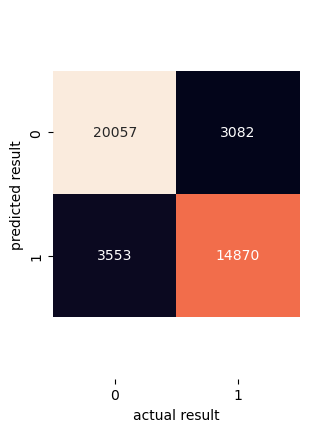

In [105]:
# Build confusion matrix for test dataset
mat2=confusion_matrix(predictions2, y_test)
sns.heatmap(mat2, square=True, fmt = 'g', annot=True, cbar=False)
plt.xlabel('actual result')
plt.ylabel('predicted result')
a,b = plt.ylim()
a+=.5
b-=.5
plt.ylim(a,b)
plt.show()

In [108]:
# prediction with Mary
Mary_df = pd.DataFrame({'Age': [30],
                        'Hotel wifi service': [3],
                        'Departure/Arrival  convenience': [2],
                        'Ease of Online booking': [4],
                        'Hotel location': [3],
                        'Food and drink': [4],
                        'Stay comfort': [5],
                        'Common Room entertainment': [3],
                        'Checkin/Checkout service': [4],
                        'Other service': [4],
                        'Cleanliness': [4],
                        'Type of Travel_Personal Travel': [1],
                        'Type Of Booking_Individual/Couple': [1],
                        'Type Of Booking_Not defined': [0]})

# Make a prediction using the logistic Regression model
prediction = logmodel.predict(Mary_df)

# Print the prediction
if prediction[0] == 1:
    print("Mary is predicted to be satisfied with the hotel.")
else:
    print("Mary is predicted to be neutral or dissatisfied with the hotel.")

Mary is predicted to be neutral or dissatisfied with the hotel.


### Logistic Regression Insights & Recommendations

#### **1. Improving Guest Satisfaction:**
- **Key Insights:** Hotel WiFi service and Common Room entertainment significantly impact guest satisfaction.
- **Action Steps:** 
  - Invest in high-speed, reliable WiFi.
  - Enhance Common Room entertainment.
  - Prioritize and tailor services to individual/couple travelers who may have distinct needs and expectations.

#### **2. Predictive Customer Care:**
- **Key Insights:** The model can predict guest satisfaction levels, enabling proactive customer care for individual types likely to be dissatisfied.
- **Action Steps:** 
  - Engage guests predicted to be unsatisfied with rewards or membership programs upon check-in/check-out to enhance their experience.

#### **3. Tiered Marketing Strategy:**
- **Key Insights:** A tiered marketing strategy can be designed to target specific customer groups based on their predicted satisfaction levels.
- **Action Steps:** 
  - Utilize the `predict_proba` method to target customers with a satisfaction probability between 0.40 and 0.60.
  - Implement personalized outreach campaigns, sending targeted incentives and information to regain their loyalty.

#### **Conclusion:**
- Implementing these recommendations can lead to enhanced guest satisfaction, repeat business, and positive reviews, contributing to the hotel’s long-term success.

## Conclusions
### Insights and Recommendations from Accident Data Analysis

- Analyzed data comprises 14,884 records (1986-2009), showing a decline in accidents since 2002, indicating effective safety measures.
- **Primary Accident Causes:** 
  - "Impact in participatory attraction" (2,021 injuries).
  - "Load/Unload issues" (1,507 injuries).
- **Actions Proposed:**
  - Strengthen existing safety protocols and risk management strategies.
  - Conduct regular safety inspections and maintenance.
  - Collect data on injury severity for accurate problem prioritization.
  - Implement measures addressing specific accident causes to minimize risk.

### Insights from Logistic Regression Analysis

- **Significant Factors Affecting Guest Satisfaction:**
  - Hotel WiFi service quality.
  - Common Room entertainment.
- **Strategies for Improvement:**
  - Invest in reliable, high-speed WiFi and improve entertainment options.
  - Develop a tiered marketing strategy targeting customers with varying satisfaction probabilities to regain customer loyalty.

### Recommended Hotel Package Features

- **Optimal Features Combination:**
  - Strong WiFi, full buffet breakfast, advanced gym, flexible check-in, shuttle service, air purifiers option, no jacuzzi, VIP shop, 80°F pool temperature.
- **Estimated Cost:** $235.55 per room (under the $250 budget), allowing flexibility and a buffer for complimentary services for improved customer satisfaction.
- **Outcome:** Balanced customer preferences, cost-effectiveness, and revenue opportunities, ensuring a satisfying and value-for-money guest experience.